In [231]:
import numpy as np
from keras.preprocessing import image
from keras.applications import resnet50
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load Keras ResNet50 
model = resnet50.ResNet50()

102850560/102853048 [============================>.] - ETA: 0s

In [290]:
# Load the image file, resizing it to 224x224 pixels (required by this model)
img = image.load_img("pics/flower.jpg", target_size=(224, 224))

In [291]:
# Convert img a numpy array
x = image.img_to_array(img)

In [292]:
# Add a forth dimension since Keras expects a list of images
x = np.expand_dims(x, axis=0)

In [293]:
# Scale the input image to the range used in the trained network
x = resnet50.preprocess_input(x)

In [294]:
predictions = model.predict(x)

In [295]:
predicted_classes = resnet50.decode_predictions(predictions, top=9)

This is an image of:
 - daisy: 0.195904 likelihood
 - binder: 0.147152 likelihood
 - sea_urchin: 0.144903 likelihood
 - quill: 0.089136 likelihood
 - sea_anemone: 0.050784 likelihood
 - vase: 0.024805 likelihood
 - bearskin: 0.022476 likelihood
 - lotion: 0.018639 likelihood
 - lampshade: 0.016354 likelihood


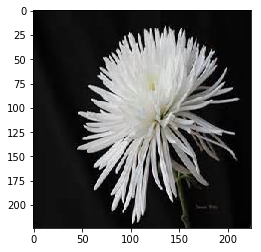

In [296]:
plt.imshow(img)

print("This is an image of:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" - {}: {:2f} likelihood".format(name, likelihood))